# Lab 6: Training Deep Recurrent Neural Network
Name1, Student's ID1<br>
Name2, Student's ID2<br>
Name3, Student's ID3<br>

*Note: Please name your file*

## Lab Instruction - Emojify

In this lab, you will learn to train a deep Recurrent neural network using Keras library with Tensorflow backend. Your task is to do the sentimental analysis which you will predict the emoji that represent the emotion in each sentence.


In [1]:
# Import require library
from keras import *
from keras.preprocessing import text
from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split

import _utils as fn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


### Read data

In [2]:
# import data
df = pd.read_csv('data/emoji_data.csv')

In [3]:
df.head()

,sentence,emoji
0,"During the period of falling in love, each tim...",0
1,When I was involved in a traffic accident.,1
2,When I was driving home after several days of...,2
3,When I lost the person who meant the most to me.,3
4,The time I knocked a deer down - the sight of ...,4


In [4]:
# Split features and target
X = df['sentence'].values
y = df['emoji'].values

In [5]:
type(X)

numpy.ndarray

In [6]:
X[0]

'During the period of falling in love, each time that we met and especially when we had not met for a long time.'

In [7]:
y[0]

0

### Split train test

In [8]:
# Split train test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.1, 
                                                    stratify=y,
                                                    random_state=0)

# Split train validate
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,
                                                  test_size=0.1, 
                                                  stratify=y_train,
                                                  random_state=0)

Text(0.5,1,'y test')

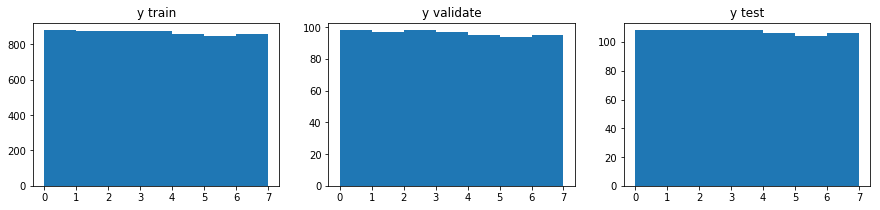

In [9]:
# Plot target distribution
fig, ax = plt.subplots(1,3,figsize=(15,3))

bins = [0,1,2,3,4,5,6,7]

ax[0].hist(y_train,bins=bins)
ax[0].set_title('y train')

ax[1].hist(y_val,bins=bins)
ax[1].set_title('y validate')

ax[2].hist(y_test,bins=bins)
ax[2].set_title('y test')

In [10]:
# Show example input
X_train[0]

'I was at a boarding school during my primary school days. I was broken so I pretended I was very sick. My father came and he picked me up. He spent a lot of money on medical expenses which all proved to be negative.'

In [11]:
# Lenght of example input sentence
len(X_train[0].split())

44

In [12]:
y_train[0]

6

### Preprocess data: Tokenizer & Padding

In [13]:
# Define parameter
max_words = 5000
max_features = 5000
maxlen = 20

In [14]:
# Define Tokenizer
tokenizer = text.Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)

In [15]:
tokenizer

In [18]:
# Preprocess data function
def preprocess_fn(data):
    sequeces = tokenizer.texts_to_sequences(data)
    padding_sequences = sequence.pad_sequences(sequeces,
                                               maxlen=maxlen)
    return padding_sequences
    

In [19]:
X_train = preprocess_fn(X_train)
X_val = preprocess_fn(X_val)
X_test = preprocess_fn(X_test)

### Build a model with word embedding

In [20]:
# Define model
rnn = models.Sequential()

rnn.add(layers.Embedding(max_features, 32,input_length=maxlen))

rnn.add(layers.LSTM(32))
rnn.add(layers.Dense(64, activation='elu'))
rnn.add(layers.Dense(7, activation='softmax'))

In [21]:
# Compile model
rnn.compile(optimizer='rmsprop',
            loss='sparse_categorical_crossentropy',
            metrics=['acc'])

In [22]:
# Show model structure
rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 32)            160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 455       
Total params: 170,887
Trainable params: 170,887
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define callbacks


In [23]:
# Fit model
history = rnn.fit(X_train,y_train,
                  batch_size=32,
                  epochs=5,
                  validation_data=(X_val,y_val))

Train on 6058 samples, validate on 674 samples
Epoch 1/5
6058/6058 [==============================] - 10s 2ms/step - loss: 1.8635 - acc: 0.2252 - val_loss: 1.7347 - val_acc: 0.2953
Epoch 2/5
6058/6058 [==============================] - 9s 1ms/step - loss: 1.4962 - acc: 0.4178 - val_loss: 1.5678 - val_acc: 0.3902
Epoch 3/5
6058/6058 [==============================] - 9s 1ms/step - loss: 1.2801 - acc: 0.5116 - val_loss: 1.5637 - val_acc: 0.4332
Epoch 4/5
6058/6058 [==============================] - 9s 1ms/step - loss: 1.1531 - acc: 0.5711 - val_loss: 1.5275 - val_acc: 0.4421
Epoch 5/5
6058/6058 [==============================] - 9s 1ms/step - loss: 1.0451 - acc: 0.6200 - val_loss: 1.5171 - val_acc: 0.4451


Last train accuracy: 0.6200066028392208
Last validation accuracy: 0.44510385756676557


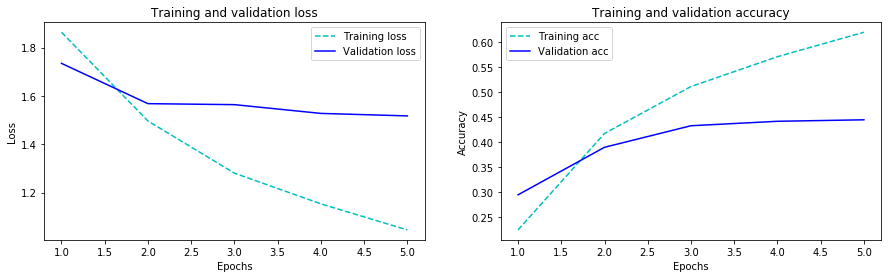

In [24]:
# Plot accuracy and loss over each epochs
fn.show_result(history)

### Evaluate Model
Baseline of the model is 14.28% (Random prediction)

In [25]:
# Evaluate model with test data
rnn.evaluate(X_test,y_test)

748/748 [==============================] - 0s 207us/step


[1.4801829301099727, 0.47459893048128343]

In [26]:
# Show confusino matrix and prediction report
fn.evaluation_report(rnn,X_test,y_test)

[[77  1  2 17  5  2  4]
 [10 49  4 20 19  1  5]
 [ 4  5 12 14 11 10 52]
 [ 6  3  3 62  4 10 20]
 [ 7  3  4  6 54 17 15]
 [ 9  3  4 14 10 39 25]
 [ 2  1  8 17  7  9 62]]
             precision    recall  f1-score   support

          0       0.67      0.71      0.69       108
          1       0.75      0.45      0.57       108
          2       0.32      0.11      0.17       108
          3       0.41      0.57      0.48       108
          4       0.49      0.51      0.50       106
          5       0.44      0.38      0.41       104
          6       0.34      0.58      0.43       106

avg / total       0.49      0.47      0.46       748

Loss: 1.4801829301099727 Accuracy: 0.47459893048128343


array([1, 6, 6, 5, 6, 3, 0, 3, 3, 4, 4, 3, 3, 4, 4, 1, 6, 6, 5, 6, 4, 0,
       4, 6, 3, 4, 3, 1, 6, 6, 3, 5, 2, 4, 6, 0, 6, 6, 6, 0, 0, 4, 3, 2,
       4, 6, 3, 3, 3, 3, 3, 0, 1, 0, 5, 5, 3, 4, 3, 6, 0, 1, 3, 0, 0, 6,
       6, 6, 0, 3, 4, 4, 1, 0, 2, 4, 6, 3, 6, 3, 6, 5, 3, 2, 5, 2, 5, 5,
       6, 6, 0, 1, 5, 6, 0, 0, 0, 3, 5, 6, 6, 4, 4, 0, 5, 4, 0, 0, 0, 3,
       5, 3, 0, 6, 0, 1, 4, 6, 3, 5, 1, 5, 6, 4, 2, 4, 0, 0, 2, 4, 6, 2,
       3, 6, 1, 0, 4, 6, 5, 4, 0, 4, 6, 3, 2, 2, 2, 5, 3, 1, 4, 0, 2, 1,
       0, 3, 0, 3, 4, 4, 6, 2, 4, 0, 3, 3, 5, 3, 6, 3, 3, 0, 4, 3, 3, 6,
       5, 5, 1, 4, 6, 2, 4, 5, 0, 0, 0, 6, 3, 3, 0, 3, 3, 3, 3, 6, 6, 4,
       6, 2, 5, 4, 2, 0, 5, 6, 5, 6, 1, 1, 0, 6, 6, 0, 2, 3, 3, 6, 3, 6,
       0, 3, 5, 4, 6, 5, 4, 0, 6, 4, 6, 0, 5, 0, 1, 6, 6, 5, 6, 4, 6, 4,
       0, 4, 6, 6, 0, 1, 5, 5, 6, 4, 2, 6, 3, 6, 4, 4, 3, 6, 4, 0, 3, 6,
       6, 4, 6, 2, 6, 6, 4, 0, 5, 3, 6, 3, 1, 6, 3, 6, 6, 0, 1, 4, 6, 2,
       6, 6, 6, 0, 6, 3, 0, 5, 0, 5, 6, 5, 0, 1, 6,

In [27]:
rnn.save('model1.h5')

### Play with your model
**Emoji**
0 = joy 😆
1 = fear 😱
2 = anger 😡
3 = sadness 😭
4 = disgust 🤮
5 = shame 😳
6 = guilt 😞

In [ ]:
input_text = 'I like this class'

In [30]:
# Define predict function
def predict_emoji(input_text, model):
    
    prepro_input = preprocess_fn([input_text])
    
    pred_class = model.predict(prepro_input).argmax(axis=1)
    
    label_to_emoji = ['😆','😱','😡','😭','🤮','😳','😞']
    
    result = label_to_emoji[int(pred_class)]
    
    print('%s %s'%(input_text,result))
    

In [32]:
# Test your model
input_text = 'I am hungry'
predict_emoji(input_text, rnn)

I am hungry 😭
